## Cryptocurrency Clusters

### Data Preparation

In [48]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [49]:
file_path = Path("Data/crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head(5)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [50]:
#df_crypto.dtypes
df_crypto


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [51]:
df_crypto.drop(df_crypto[df_crypto['IsTrading'] == False].index, inplace=True)
df_crypto = df_crypto.drop(['IsTrading'],axis=1)
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [52]:
df_crypto['TotalCoinSupply'] = pd.to_numeric(df_crypto['TotalCoinSupply'],errors='coerce')
#df_crypto

In [53]:
df_currency = df_crypto.dropna()
#df_currency

In [54]:
df_cryptocurrency = df_currency.drop(df_currency[df_currency['TotalCoinsMined']<=0].index)
#df_cryptocurrency

In [55]:
df_cryptocurrency=df_cryptocurrency.drop(['CoinName','Unnamed: 0'],axis=1)
#df_cryptocurrency

In [56]:
df_cryptocurrency.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [57]:
df_dummies = pd.get_dummies(df_cryptocurrency)
#df_dummies

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies[['TotalCoinsMined','TotalCoinSupply']])
scaled_data

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [59]:
df_scaled = pd.DataFrame(scaled_data)
#df_scaled

In [60]:
new_df_cryptocurrency = pd.DataFrame(df_dummies)
new_df_cryptocurrency['TotalCoinsMined'] =df_scaled[0]
new_df_cryptocurrency['TotalCoinSupply'] =df_scaled[1]

crypto_final = new_df_cryptocurrency.dropna()
crypto_final.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,-0.115726,-0.151629,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,-0.116731,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.114622,-0.149767,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimensionality Reduction

### PCA Model

In [61]:
# Initialize PCA model
pca = PCA(n_components=0.90)
# Get two principal components for the data.
crypto_pca = pca.fit_transform(crypto_final)
crypto_pca

array([[-0.24151077,  0.61514489,  0.80680123, -0.22857947,  0.04749688],
       [ 2.93662598,  0.6279792 ,  1.03534185, -0.40636504, -0.13798952],
       [-0.22101086,  0.93972894, -0.09684202, -0.21200764,  0.05899655],
       ...,
       [-0.25030116,  0.32949138, -0.33669873,  1.14157068,  0.32574096],
       [25.95390649,  0.11701609,  0.07737958,  0.06633505,  0.09752985],
       [-0.23273797, -0.5124082 , -0.47387553, -0.07985703, -0.10521112]])

In [62]:
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2","principal component 3", "principal component 4", "principal component 5" ]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-0.241511,0.615145,0.806801,-0.228579,0.047497
1,2.936626,0.627979,1.035342,-0.406365,-0.137990
2,-0.221011,0.939729,-0.096842,-0.212008,0.058997
3,-0.266698,-0.478116,-0.748021,-0.371819,0.531672
4,-0.255333,-0.511726,-0.473934,-0.080186,-0.105339


In [63]:
pca.explained_variance_ratio_

array([0.71230101, 0.08172273, 0.05317656, 0.03469429, 0.02515091])

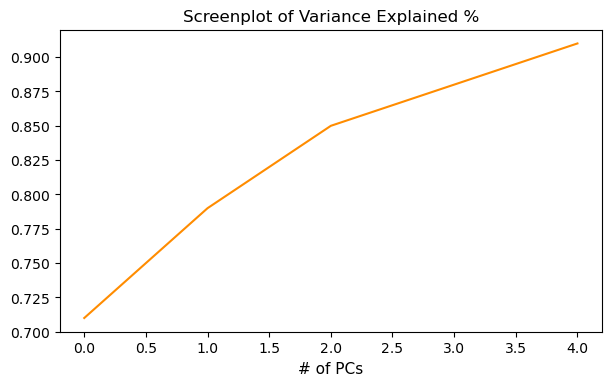

In [70]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(7,4), dpi=100)
plt.plot(variance_exp_cumsum, color='darkorange')
plt.title('Screenplot of Variance Explained %', fontsize=12)
plt.xlabel('# of PCs', fontsize=11)
plt.show()

### t-SNE 

In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(learning_rate=50)

In [76]:
# reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

In [84]:
tsne_features.shape

(205, 2)

The dataset has 2 columns

In [78]:
# Prepare to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

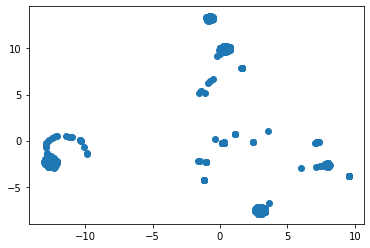

In [83]:
# the clusters visualization
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

### Cluster Analysis with k-Means

C:\Users\dasa\.conda\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


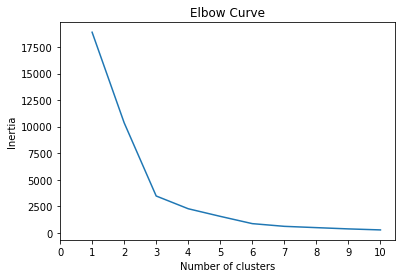

In [88]:
# creating elbow plot to identify  the best number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [89]:
df_elbow

,k,inertia
0,1,18891.782448
1,2,10363.508928
2,3,3462.674562
3,4,2261.307539
4,5,1544.468042
5,6,858.696963
6,7,603.922267
7,8,481.780299
8,9,362.329869
9,10,266.668810
